#### Deep Learning

# Basic Classification
#### Francisco Maiocchi

***
### Introducción

Este ejemplo utiliza redes neuronales para clasificar imágenes de ropa. Utiliza KERAS que es la API de alto nivel de TensorFlow. Este ejemplo está en web oficial de TensorFlow en https://www.tensorflow.org/tutorials/keras/basic_classification?hl=es

***
### Imports

In [19]:
# Importo TensorFlow como tf
import tensorflow as tf
# Importo keras
from tensorflow import keras

# Librerias auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


***
### Descargo el dataset de Fashion MNIST incluido en KERAS
Este dataset contiene 70000 imágenes de 10 categorías distintas en escala de grises. La resolución es de 28 x 28 pixeles. En principio usaremos 60000 imágenes para el entrenamiento y 10000 para el test.

In [20]:
# Accedo al dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

La carga del dataset nos devuelve 4 NumPy arrays:  
+ train_images son las imagenes en si. Son NumPy arrays de 27x27 con valores entre 0 y 255.
+ train_labels son las etiquetas para las posibles clasificaciones. En este caso es un número entre 0 y 9 que se corresponde con la tabla de abajo.
+ test_images y test_labels idem anterior pero para el caso del testeo.

|Label   |Class   |  
|---|---|
|0   |T-shirt/top   |
|1   |Trouser   |
|2   |Pullover   |
|3   |Dress   |
|4   |Coat   |
|5   |Sandal   |
|6   |Shirt   |
|7   |Sneaker   |
|8   |Bag   |
|9   |Ankle boot   |



In [21]:
# Guardo los nombres de las clases ya que no estan incluidas en el dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

***
### Exploremos un poco el dataset

In [22]:
print("Las dimensiones de train_images son: " + str(train_images.shape))
print("La cantidad de train_labels es: " + str(len(train_labels)))
print("La cantidad de test_label es: " + str(len(test_labels)))


Las dimensiones de train_images son: (60000, 28, 28)
La cantidad de train_labels es: 60000
La cantidad de test_label es: 10000


***
### Preprocesamos el dataset
Primero podemos ver como los valores de los pixeles oscilan entre 0 y 255

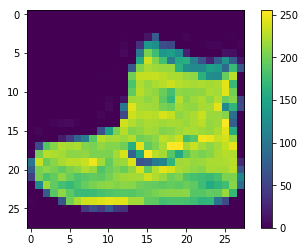

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Vamos a normalizar a 1 el rango de valores posibles antes de alimentar la red. Para esto, dividimos por 255 y casteamos a float.

In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para corroborar que los datos esten bien, vamos a mostrar las primeras 25 imágenes con su label correspondiente

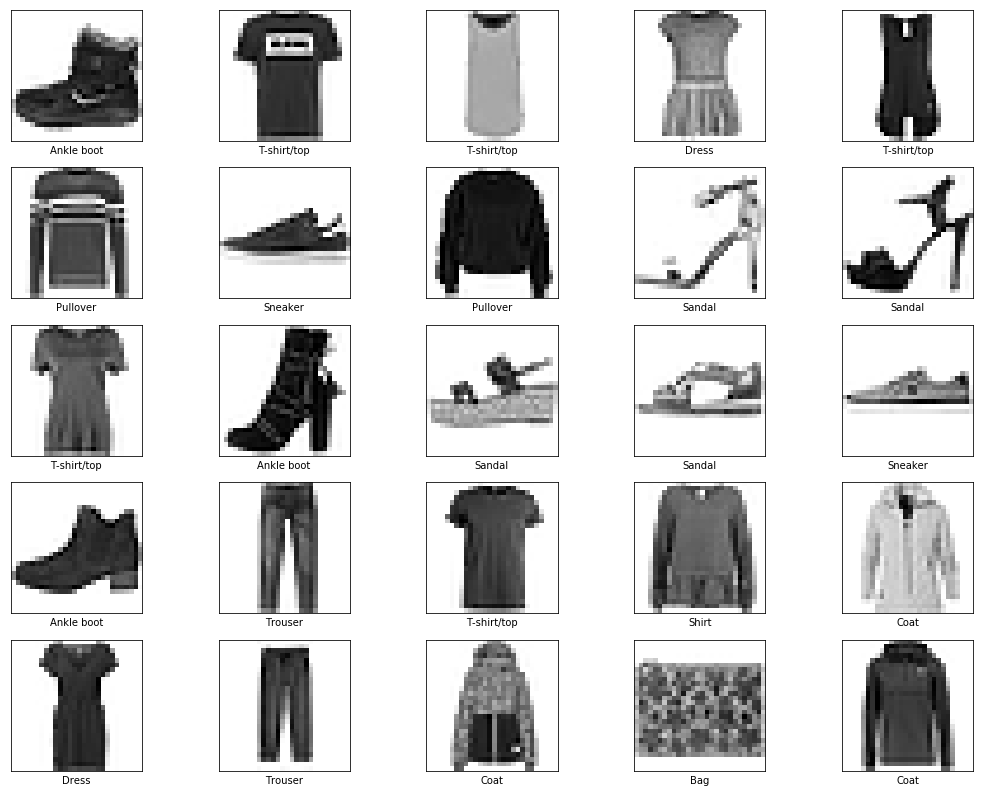

In [25]:
plt.figure(figsize=(18,14))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

***
### Armado del modelo
La construcción de la red neuronal requiere configurar las capas del modelo para luego compilarlo.
#### Configuración de las capas
El bloque básico para la construcción de una red neuronal es una capa. Las capas extraen representaciones de los datos introducidos en ellas. Y, con suerte, estas representaciones son más significativas para el problema en cuestión.  

Gran parte del Deep Learning consiste en encadenar capas simples. Muchas capas, como tf.keras.layers.Dense, tienen parametros que se aprenden durante el entrenaiento.

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Lo que hace keras.Sequential es encadenar distintas layers.  

La primer capa de esta red, tf.keras.layers.Flatten, transforma el formato de las imagenes de entrada (28x28) a un array de 784. Esta capa no tiene parametros para aprender, solo formatea la data.  

Luego, la red consiste de dos capas tf.keras.layers.Dense. Estas capas se denominan densely-connected o fully-connected. La primera tiene 128 neuronas. La segunda (y última) es una capa softmax de 10 neuronas. Esto devuelve un array de 10 probabilidades que, sumando todas, el resultado es igual a 1. Por lo tanto, cada nodo contiene la probabilidad de que la imagen de entrada pertenezca a la clase.  

Para aclarar, la funcion activación es una función que se aplica a la salida de una capa de una red neuronal. Proveen la no linealidad. La más utilizada es ReLU (Rectified Linear Unit) que esta definida como $f(x)=max(0,x)$. Es decir, devuelve el máximo valor mayor a 0 (o 0 si no existe dicho valor). La última capa utiliza la función de activación softmax, que es muy común en las capas de salida. https://es.wikipedia.org/wiki/Funci%C3%B3n_SoftMax  

#### Compilación del modelo
Antes de que el modelo este listo para el entrenamiento, se necesitan algunas configuraciones adicionales.  
+ Loss function: mide la precición del modelo durante el entrenamiento. Se busca minimizar esta función en orden de llevar el modelo a la direccion correcta.
+ Optimizer: define como sera actualizado el modelo según los datos que ve y la Loss function. Utilizamos ADAM (adaptive moment estimation) el cual es bastante popular https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/.
+ Metrics: se usa para monitorear el entrenamiento y las etápas de testeo. En este ejemplo usamos accuracy, la cantidad de imagenes que son correctamente clasificadas.

In [27]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

***
### Entrenamiento del modelo
El entrenamiento requiere de los siguientes pasos:
+ Alimentar el modelo con los datos. En este caso train_images y train_labels.
+ El modelo aprende a asociar imagenes con labels.
+ Hacemos que el modelo haga predicciones sobre el test set y verificamos su funcionamiento.

Para arrancar el entrenamiento se llama a model.fit. En este caso corremos 5 épocas.

In [28]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.4995 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3749 - acc: 0.8648
Epoch 3/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.3355 - acc: 0.8771
Epoch 4/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3113 - acc: 0.8862
Epoch 5/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2936 - acc: 0.8911


***
### Evaluación de precisión
Comparamos como funciona el modelo con los datos de test.

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 27us/step
Test accuracy: 0.8744


Sucede que la precisión del test es un poco menor que la del entrenamiento. Cuando un modelo se comporta peor con datos nuevos que con los del entrenamiento es un claro ejemplo de overfitting.

***
### Realización de predicciones
Una vez entrenado el modelo, se puede utilizar para realizar predicciones sobre algunas imágenes.

In [30]:
predictions = model.predict(test_images)

El modelo determinó un label para cada imagen del set de testeo. Miremos por ejemplo la primer predicción.

In [31]:
predictions[0]

array([7.5347762e-06, 3.8739305e-08, 1.5533497e-07, 5.6835940e-08,
       2.1123467e-08, 1.7115112e-02, 2.2548520e-06, 1.6583506e-02,
       1.6105569e-05, 9.6627522e-01], dtype=float32)

Vemos que la predicción es una array de 10 números. Cada número indica la confianza del modelo de que la imágen corresponde a la categoria representada por el indice. Si buscamos el valor maximo:

In [33]:
print("El valor máximo corresponde al indice " + str(np.argmax(predictions[0])) + " correspondiente a la clase " + str(class_names[np.argmax(predictions[0])]))

El valor máximo corresponde al indice 9 correspondiente a la clase Ankle boot


Si verificamos con test_labels...

In [35]:
print(test_labels[0])

9


Vemos que la predicción fue correcta.

Podemos gráficar esto para analizar el set completo.

In [37]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Si analizamos la primera categoría...

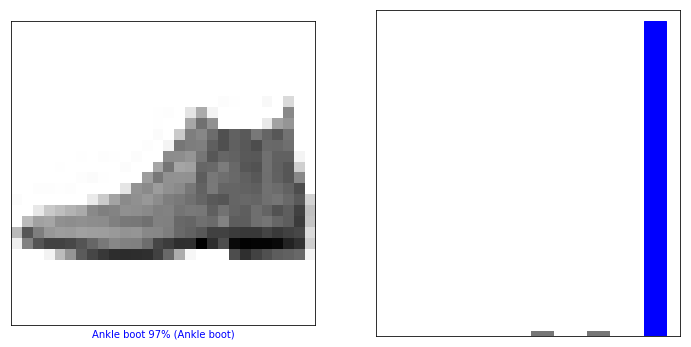

In [38]:
i = 0
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

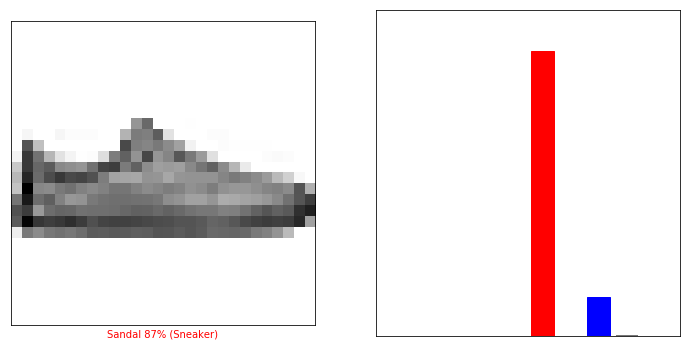

In [40]:
i = 12
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

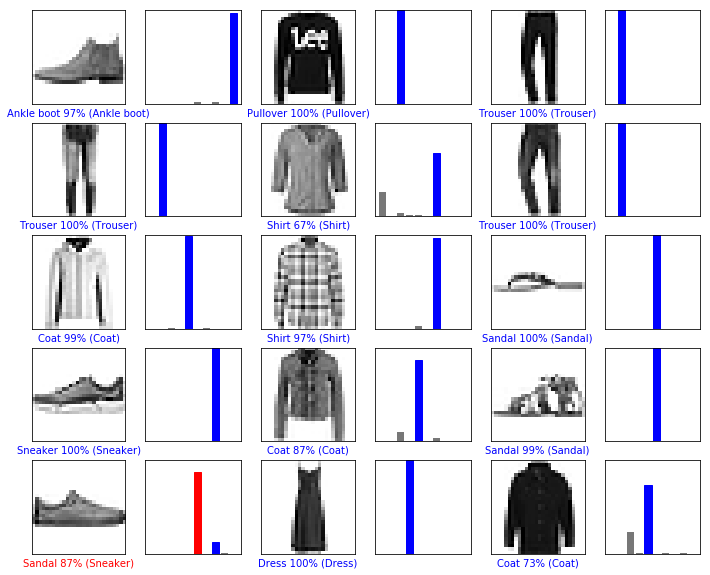

In [41]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

Finalmente podemos usar el modelo para predecir una sola imágen.

In [42]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


Los modelos tf.keras están optimizados para hacer predicciones de a lotes. Por este motivo, aunque estemos prediciendo una sola imágen, es necesario agregarla a una lista.

In [43]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Y ahora si podemos predecir...

[[7.5347762e-06 3.8739159e-08 1.5533527e-07 5.6835834e-08 2.1123428e-08
  1.7115096e-02 2.2548543e-06 1.6583523e-02 1.6105569e-05 9.6627522e-01]]


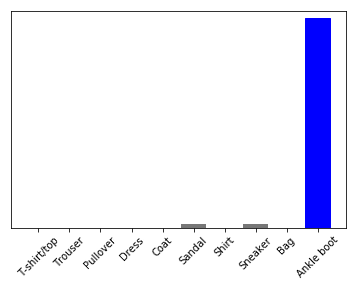

In [46]:
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)